In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pokemon=pd.read_csv("pokemon.csv")

In [3]:
pokemon.tail(5)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
802,803,poipole,7,0.6,1.8,189,poison,NaN,67,73,67,73,73,67
803,804,naganadel,7,3.6,150.0,243,poison,dragon,73,73,73,121,127,73
804,805,stakataka,7,5.5,820.0,257,rock,steel,61,131,211,13,53,101
805,806,blacephalon,7,1.8,13.0,257,fire,ghost,53,127,53,107,151,79
806,807,zeraora,7,1.5,44.5,270,electric,NaN,88,112,75,143,102,80


In [4]:
base_color=sns.color_palette()[0]

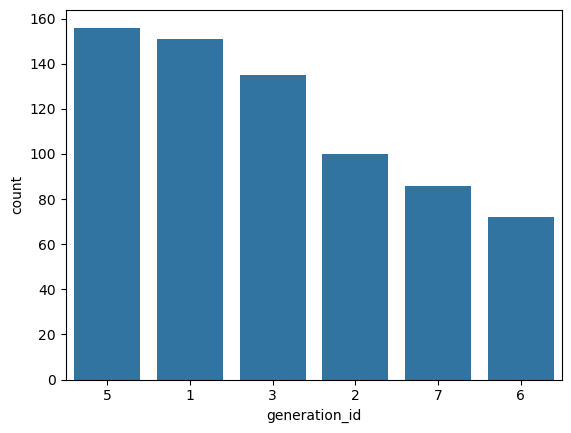

In [5]:
sns.countplot(data=pokemon,x="generation_id",color=base_color,order=[5,1,3,2,7,6]);

In [6]:
pokemon["generation_id"].value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'grass'),
  Text(1, 0, 'fire'),
  Text(2, 0, 'water'),
  Text(3, 0, 'bug'),
  Text(4, 0, 'normal'),
  Text(5, 0, 'poison'),
  Text(6, 0, 'electric'),
  Text(7, 0, 'ground'),
  Text(8, 0, 'fairy'),
  Text(9, 0, 'fighting'),
  Text(10, 0, 'psychic'),
  Text(11, 0, 'rock'),
  Text(12, 0, 'ghost'),
  Text(13, 0, 'ice'),
  Text(14, 0, 'dragon'),
  Text(15, 0, 'dark'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'flying')])

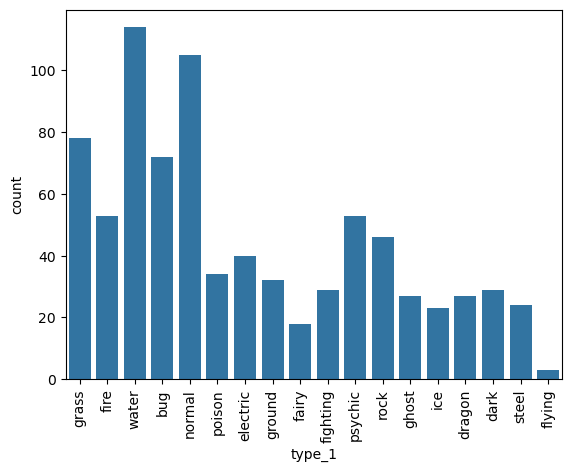

In [7]:
sns.countplot(data=pokemon,x="type_1",color=base_color)
plt.xticks(rotation=90)

In [8]:
base_color=sns.color_palette()[0]

In [9]:
pkmn_types=pokemon.melt(id_vars=["id","species"],value_vars=["type_1","type_2"],var_name="type level",value_name="type").dropna()
pkmn_types

,id,species,type level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
...,...,...,...,...
1607,801,magearna,type_2,fairy
1608,802,marshadow,type_2,ghost
1610,804,naganadel,type_2,dragon
1611,805,stakataka,type_2,steel


In [10]:
type_count=pkmn_types["type"].value_counts()
type_order=type_count.index

<AxesSubplot:xlabel='count', ylabel='type'>

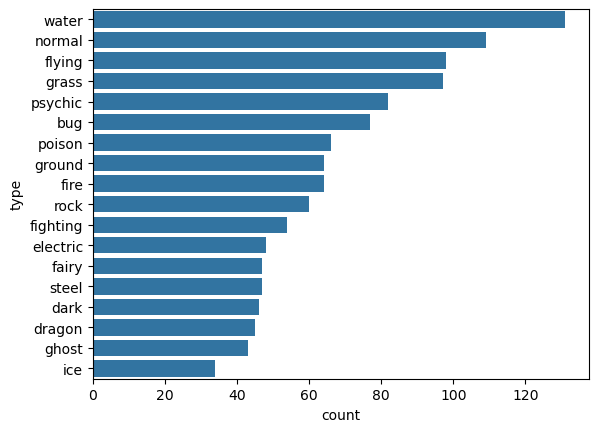

In [11]:
base_color=sns.color_palette()[0]
sns.countplot(data=pkmn_types,y="type",color=base_color,order=type_order)

In [12]:
type_count.max()

131

In [13]:
n_pokemon=pokemon.shape[0]
max_type_count=type_count[0]
max_prop=max_type_count/n_pokemon
print(max_prop)

0.1623296158612144


In [14]:
tick_props=np.arange(0,max_prop,0.02)
tick_names=["{:0.2f}".format(v) for v in tick_props]

Text(0.5, 0, 'proportion')

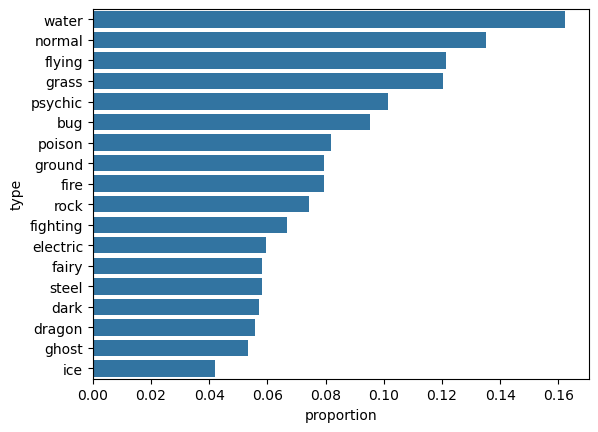

In [15]:
sns.countplot(data=pkmn_types,y="type",color=base_color,order=type_order)
plt.xticks(tick_props*n_pokemon,tick_names)
plt.xlabel("proportion")

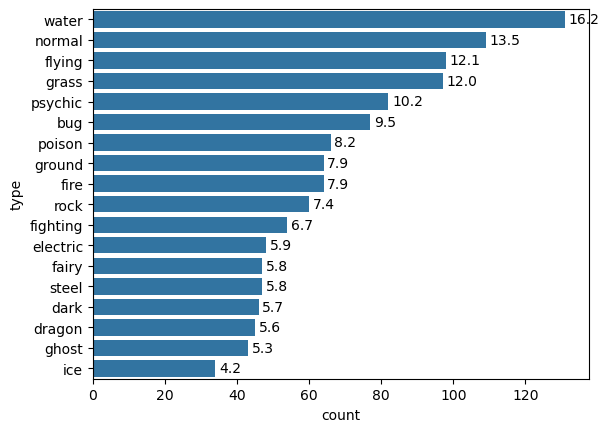

In [16]:
sns.countplot(data=pkmn_types,y="type",color=base_color,order=type_order)
for i in range(type_count.shape[0]):
    count=type_count[i]
    pct_string="{:0.1f}".format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va='center')


In [17]:
sales_data=pd.read_csv("sales-data.csv")

In [18]:
sales_data.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [19]:
sales_data.shape

(8190, 12)

In [20]:
sales_data.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [21]:
na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price'], axis=1).isna().sum()
print(na_counts)

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [22]:
pokemon.head(5)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [23]:
sorted_counts=pokemon["generation_id"].value_counts()


In [24]:
sorted_counts.index

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

(-1.1063354030102694,
 1.1197837798494124,
 -1.114763917050899,
 1.1113552658087829)

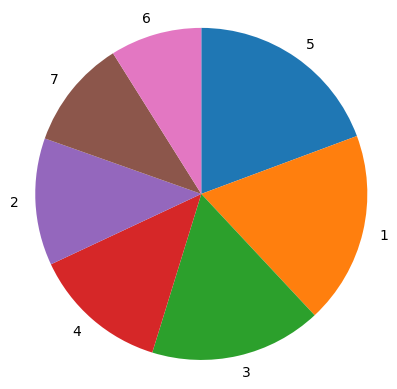

In [25]:
plt.pie(sorted_counts,labels=sorted_counts.index,startangle=90,counterclock=False)
plt.axis("square")

(-1.1063354030102694,
 1.1197837798494124,
 -1.114763917050899,
 1.1113552658087829)

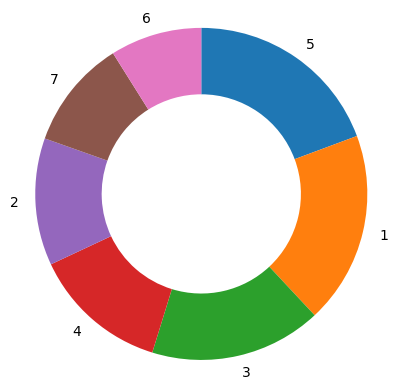

In [26]:
plt.pie(sorted_counts,labels=sorted_counts.index,startangle=90,counterclock=False,wedgeprops={"width":0.4})
plt.axis("square")

In [27]:
sorted_counts=pokemon["type_1"].value_counts()

In [28]:
sorted_counts.index

Index(['water', 'normal', 'grass', 'bug', 'fire', 'psychic', 'rock',
       'electric', 'poison', 'ground', 'dark', 'fighting', 'ghost', 'dragon',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object')

(-1.1013649972570692,
 1.109810296336117,
 -1.1024628863899109,
 1.1087124072032752)

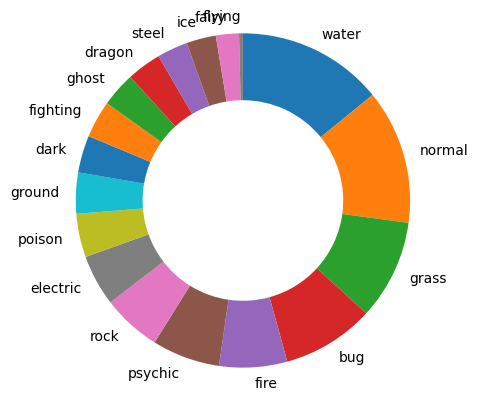

In [29]:
plt.pie(sorted_counts,labels=sorted_counts.index,startangle=90,counterclock=False,wedgeprops={"width":0.4})
plt.axis("square")

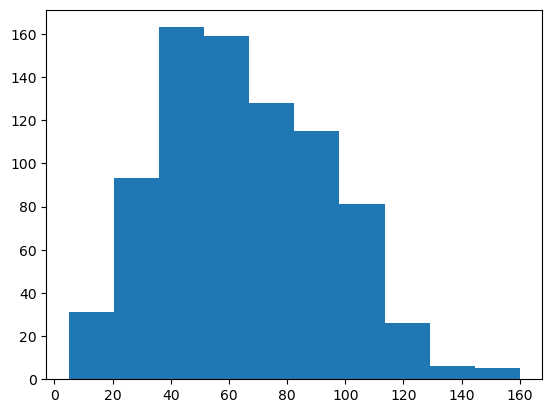

In [30]:
plt.hist(data=pokemon,x="speed")
plt.show()

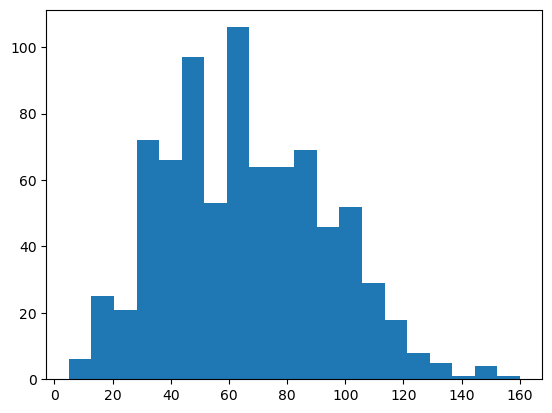

In [35]:
plt.hist(data=pokemon,x="speed",bins=20)
plt.show()

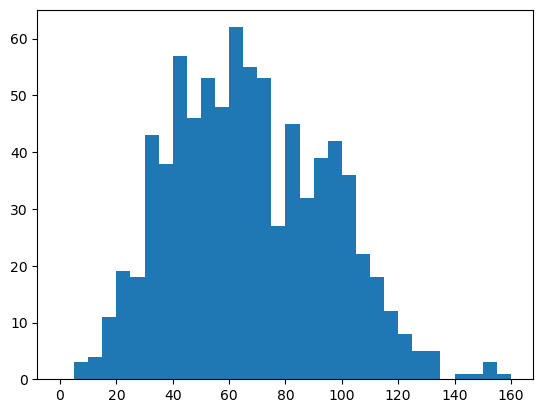

In [36]:
bins=np.arange(0,pokemon["speed"].max()+5,5)
plt.hist(data=pokemon,x="speed",bins=bins)
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_1836\1150587502.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pokemon["speed"])


<AxesSubplot:xlabel='speed', ylabel='Density'>

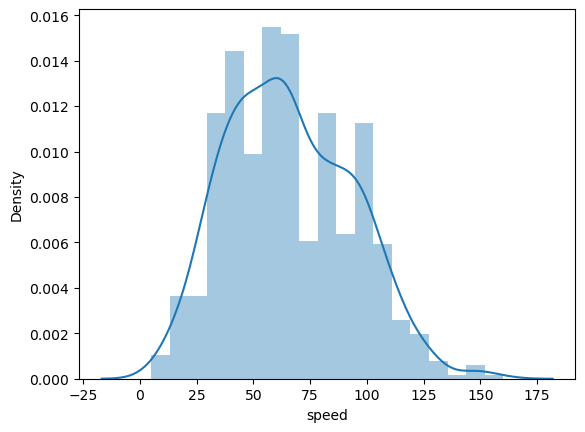

In [37]:
sns.distplot(pokemon["speed"])

C:\Users\dell\AppData\Local\Temp\ipykernel_1836\3465421695.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pokemon["speed"],kde=False)


<AxesSubplot:xlabel='speed'>

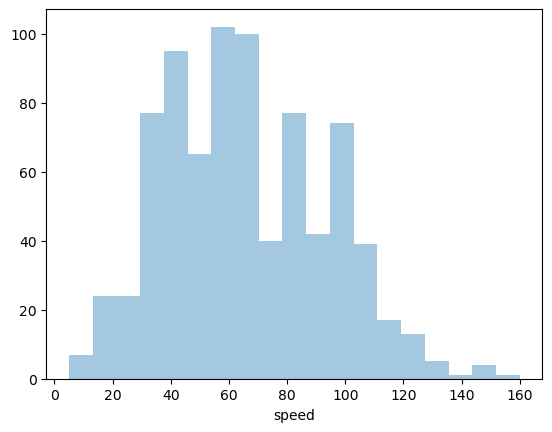

In [38]:
sns.distplot(pokemon["speed"],kde=False)


C:\Users\dell\AppData\Local\Temp\ipykernel_1836\1507312298.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( pokemon['generation_id'], bins = bin_edges, kde = False,


<AxesSubplot:xlabel='generation_id'>

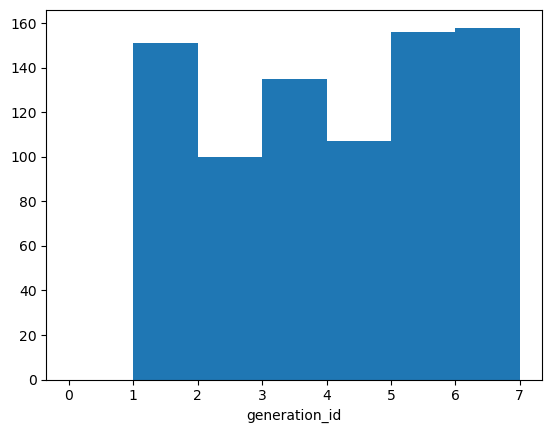

In [39]:
bin_edges = np.arange(0, pokemon['generation_id'].max()+1, 1)
sns.distplot( pokemon['generation_id'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})

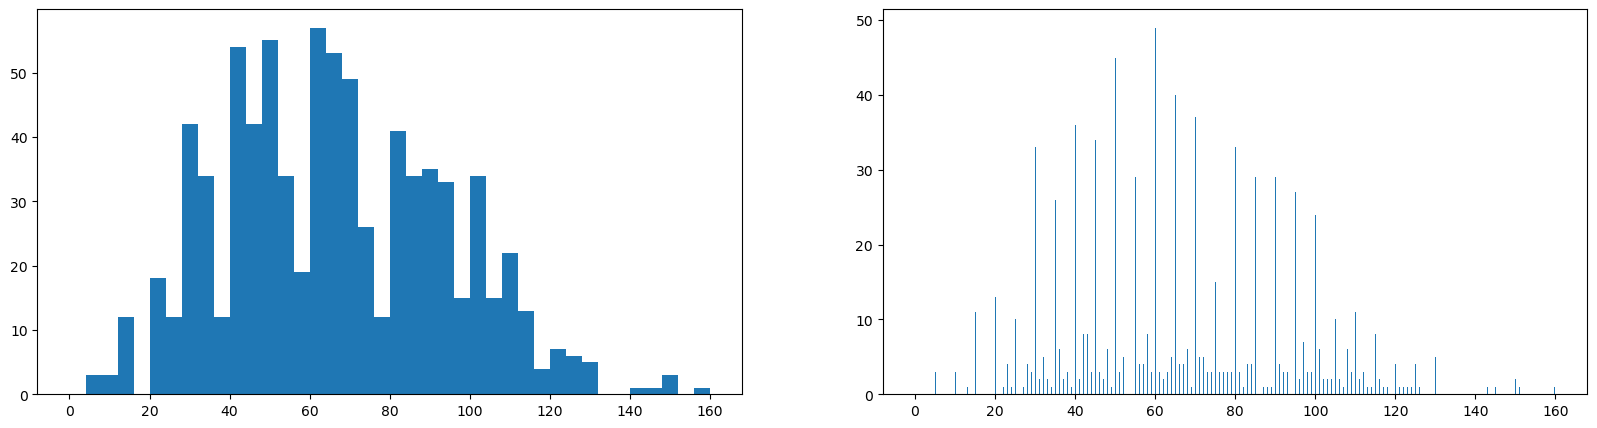

In [40]:
#plot two histogram side by side
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
bins=np.arange(0,pokemon["speed"].max()+4,4)
plt.hist(data=pokemon,x="speed",bins=bins)

plt.subplot(1,2,2)
bins=np.arange(0,pokemon["speed"].max()+1/4,1/4)
plt.hist(data=pokemon,x="speed",bins=bins)
plt.show()

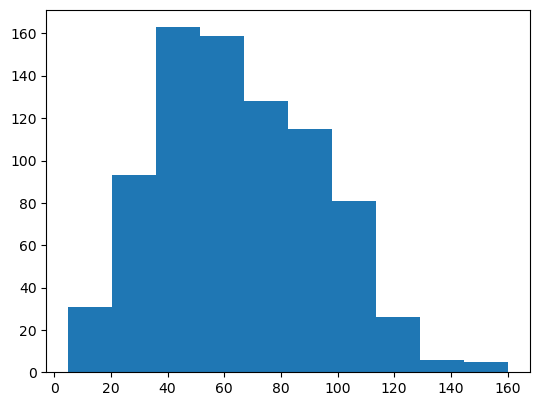

In [41]:
#figure and add axes
fig=plt.figure()
ax=fig.add_axes([.125,.125,.755,.755])
ax.hist(data=pokemon,x="speed")
plt.show()


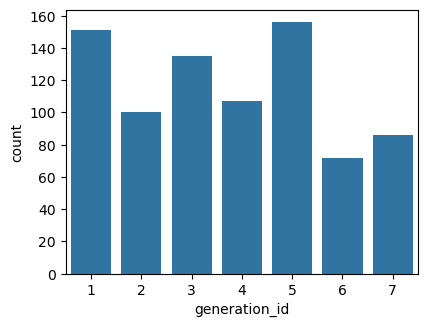

In [42]:
#use axes with seaborn countplot
fig=plt.figure()
ax = fig.add_axes([.125, .125, .550, .550])
base_color=sns.color_palette()[0]
sns.countplot(data=pokemon,x="generation_id",color=base_color,ax=ax)
plt.show()

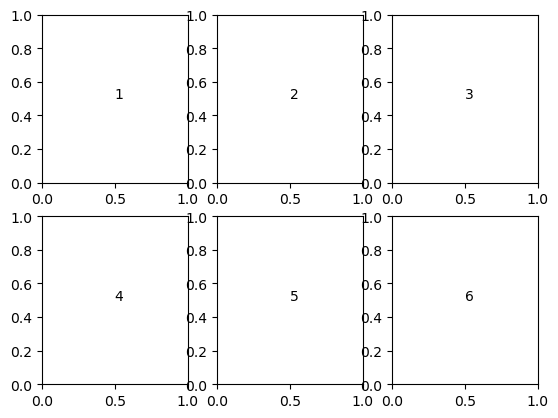

In [43]:
fig,axes=plt.subplots(2,3)
axes=axes.flatten()
for i in range(6):
    plt.sca(axes[i])
    plt.text(0.5,0.5,i+1)

In [44]:
die_roll=pd.read_csv("die-rolls.csv")
die_roll.head(2)
die_roll.max()

Dice       100
Trial 1      6
Trial 2      6
Sum         12
dtype: int64

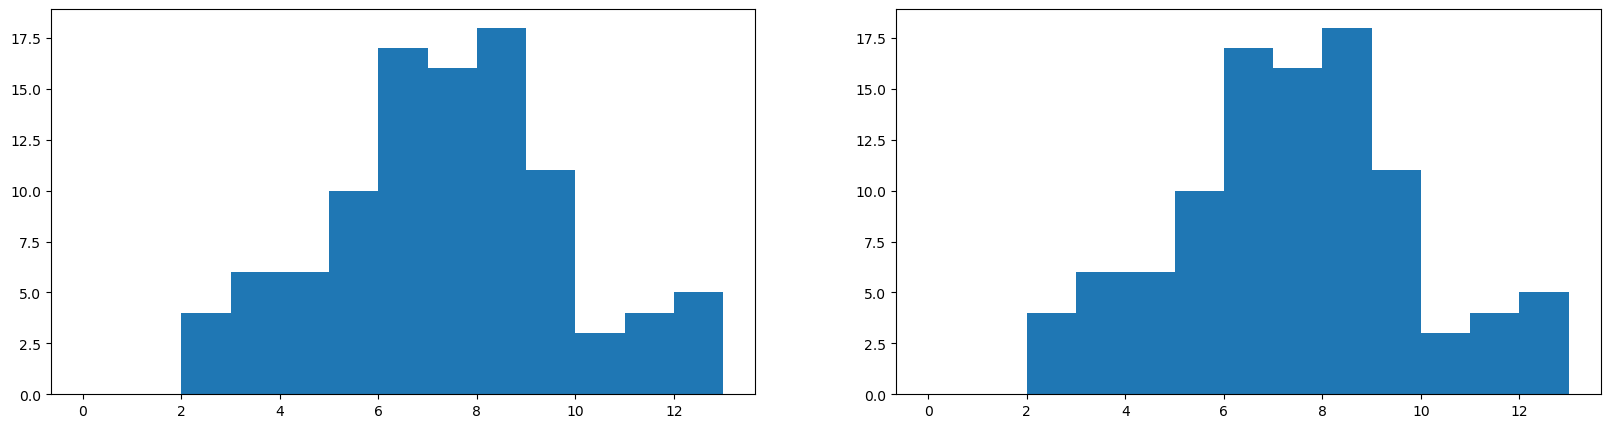

In [45]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
bins_edge=np.arange(0,12+1.1,1)
plt.hist(data=die_roll,x="Sum",bins=bins_edge)
plt.subplot(1,2,2)
bins_edge=np.arange(0,12.5+1,1)
plt.hist(data=die_roll,x="Sum",bins=bins_edge)
plt.show()


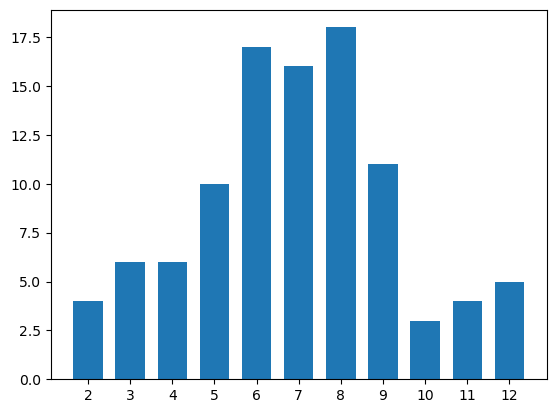

In [46]:
bins=np.arange(1.5,12+1.1,1)
plt.hist(data=die_roll,x="Sum",bins=bins,rwidth=0.7)
plt.xticks(np.arange(2,12+1,1));

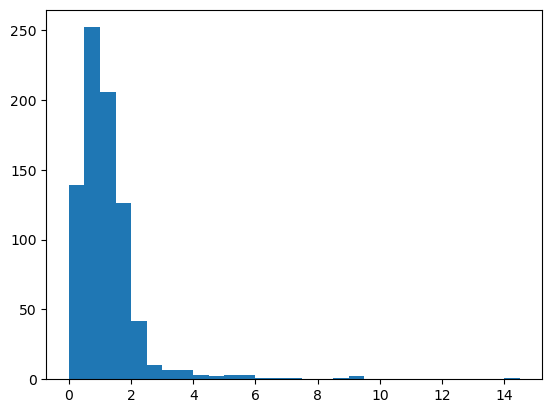

In [47]:
bins=np.arange(0,pokemon["height"].max()+0.5,0.5)
plt.hist(data=pokemon,x="height",bins=bins);

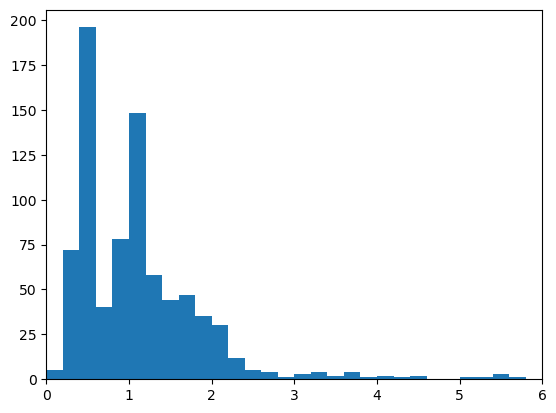

In [48]:
#histogram with change axes limit
bins=np.arange(0,pokemon["height"].max()+0.2,0.2)
plt.hist(data=pokemon,x="height",bins=bins)
plt.xlim((0,6));

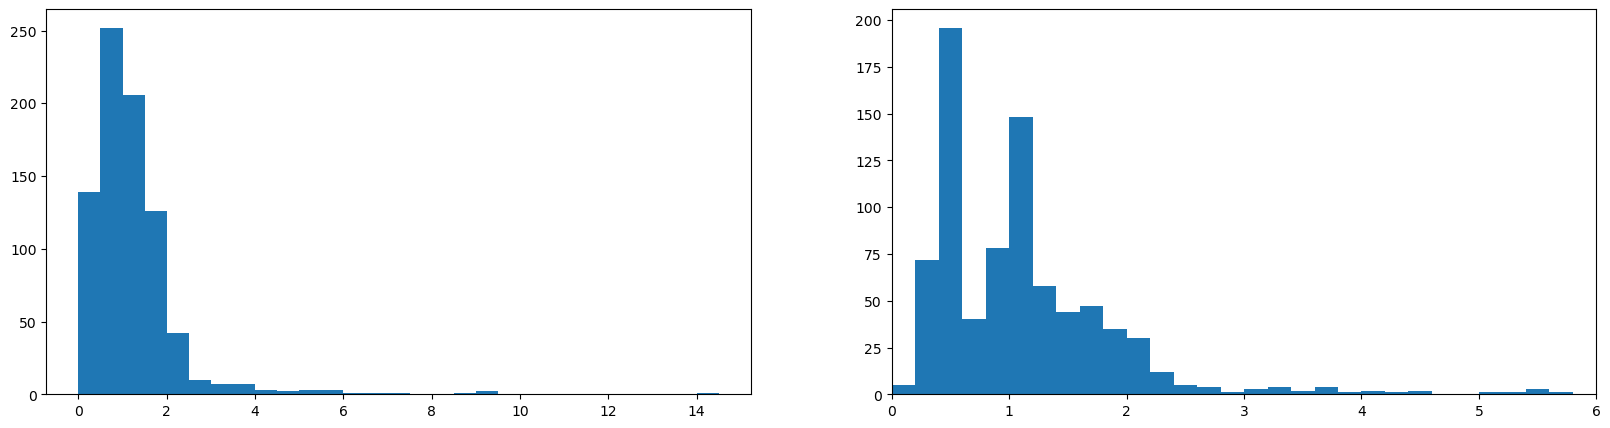

In [49]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
bins=np.arange(0,pokemon["height"].max()+0.5,0.5)
plt.hist(data=pokemon,x="height",bins=bins)

plt.subplot(1,2,2)
bins=np.arange(0,pokemon["height"].max()+0.2,0.2)
plt.hist(data=pokemon,x="height",bins=bins)
plt.xlim((0,6))
plt.show()

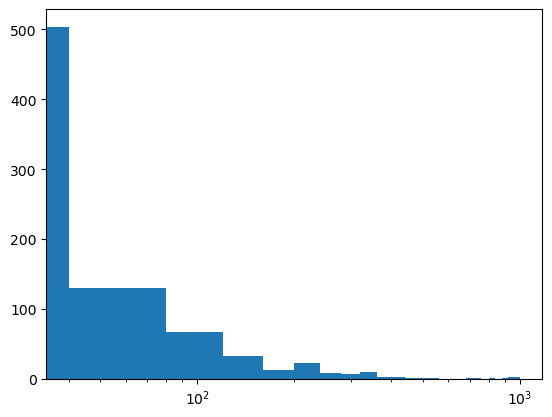

In [50]:
#scales and transformation
bins=np.arange(0,pokemon["weight"].max()+40,40)
plt.hist(data=pokemon,x="weight",bins=bins)
plt.xscale("log")

In [51]:
np.log10(pokemon["weight"].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

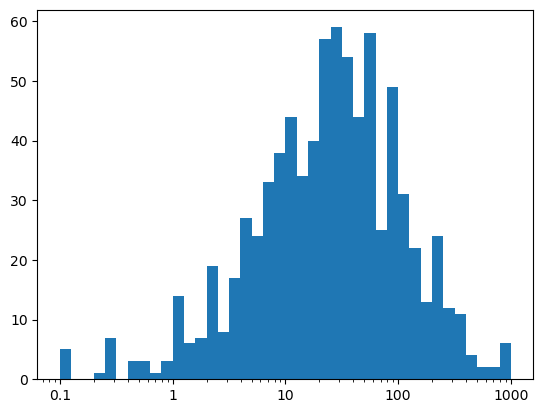

In [52]:
bins=10**np.arange(-1,3+0.1,0.1)
ticks=[0.1,1,10,100,1000]
labels=("{}".format(v)for v in ticks)
plt.hist(data=pokemon,x="weight",bins=bins)
plt.xscale("log")
plt.xticks(ticks,labels);

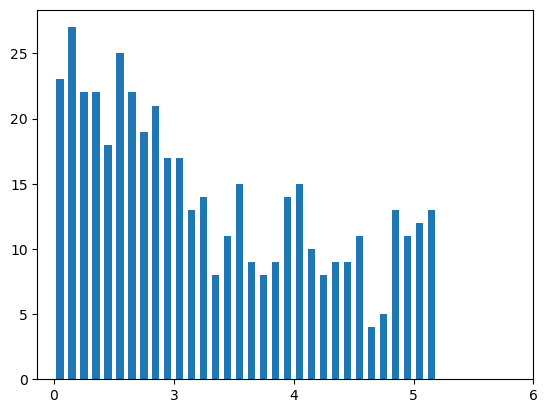

In [53]:
#custom scale instead of building log scale
def sqrt_trans(x,inverse=False):
    if not inverse:
        return np.sqrt(x)
    else:
        x**2
bins_edges=np.arange(0,sqrt_trans(pokemon['weight'].max())+1,1)
plt.hist(data=pokemon,x="weight",bins=bins_edges,rwidth=0.6)
tick_locks=np.arange(0,sqrt_trans(pokemon["weight"].max())+10,10)
plt.xticks(tick_locks,sqrt_trans(tick_locks,inverse=False).astype(int));

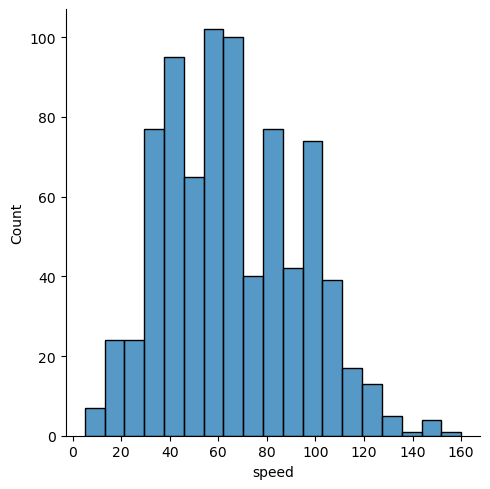

In [54]:
sns.displot(pokemon["speed"],kind="hist")

C:\Users\dell\AppData\Local\Temp\ipykernel_1836\165056966.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,hist=False,rug=True,rug_kws={"color":"y"})
C:\Users\dell\AppData\Local\Temp\ipykernel_1836\165056966.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,hist=

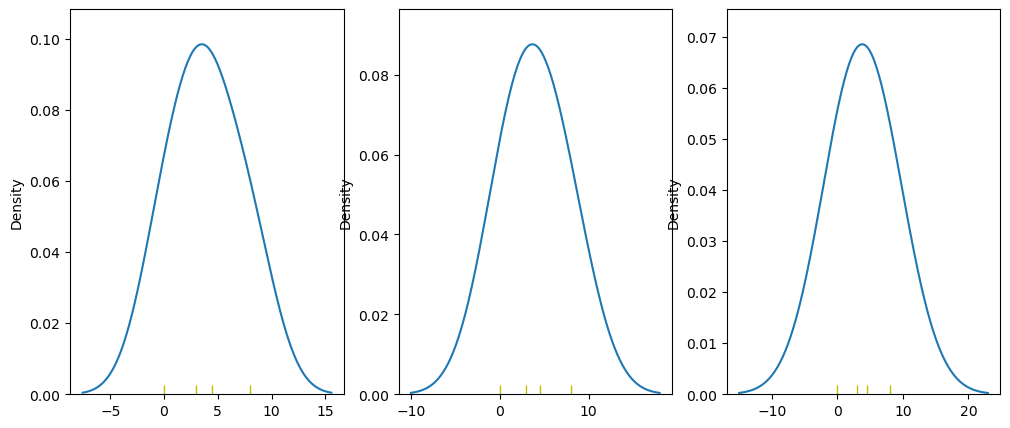

In [55]:
#displot and rugplot to plot kde
data=[0.0,3.0,4.5,8.0]
plt.figure(figsize=[12,5])
plt.subplot(1,3,1)
sns.distplot(data,hist=False,rug=True,rug_kws={"color":"y"})
plt.subplot(1,3,2)
sns.distplot(data,hist=False,rug=True,rug_kws={"color":"y"},kde_kws={"bw":1})
plt.subplot(1,3,3)
sns.distplot(data,hist=False,rug=True,rug_kws={"color":"y"},kde_kws={"bw":1.5,"kernel":"tri"});

In [56]:
fuel=pd.read_csv("fuel.csv")
fuel.shape

(3929, 20)

In [57]:
fuel.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Text(0, 0.5, 'fuel efficiency')

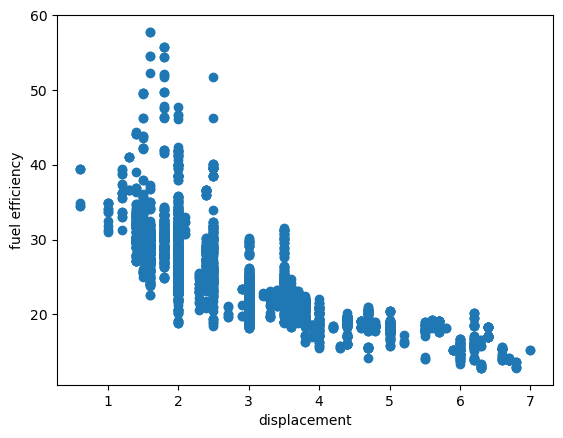

In [58]:
plt.scatter(data=fuel,x="displ",y="comb")
plt.xlabel("displacement")
plt.ylabel("fuel efficiency")

Text(0, 0.5, 'fuel efficiency')

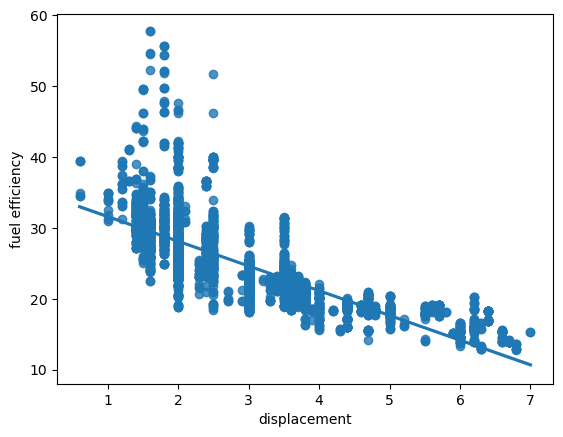

In [59]:
sns.regplot(data=fuel,x="displ",y="comb")
plt.xlabel("displacement")
plt.ylabel("fuel efficiency")

Text(0, 0.5, 'fuel efficiency')

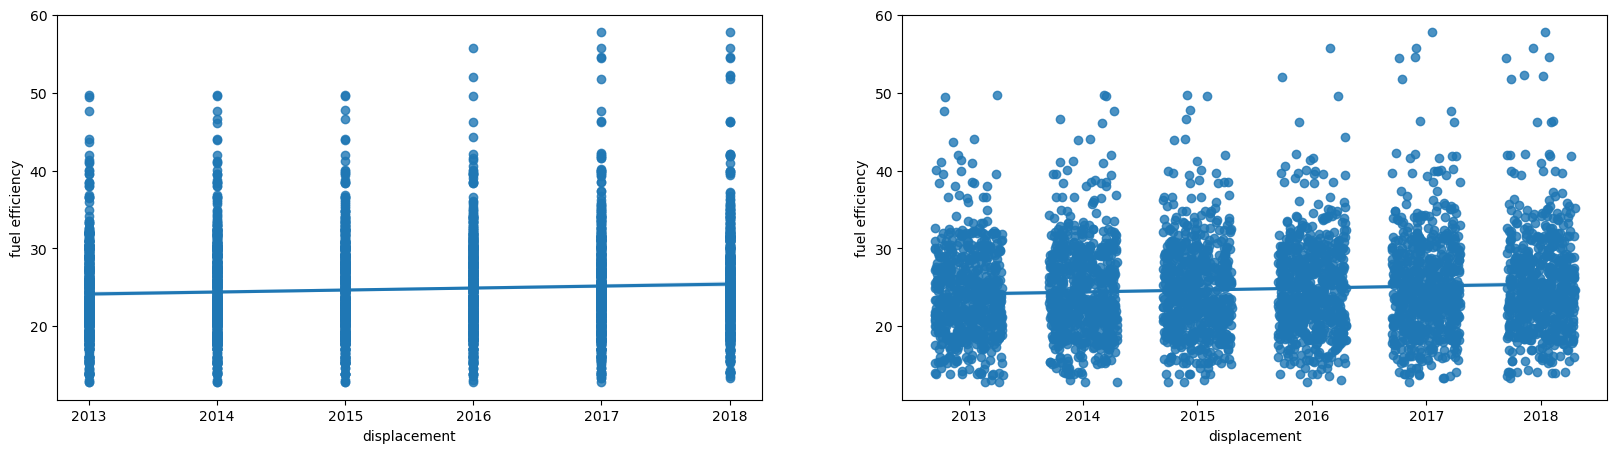

In [60]:
#overplotting and transparency
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sns.regplot(data=fuel,x="year",y="comb")
plt.xlabel("displacement")
plt.ylabel("fuel efficiency")
plt.subplot(1,2,2)
sns.regplot(data=fuel,x="year",y="comb",x_jitter=0.3)
plt.xlabel("displacement")
plt.ylabel("fuel efficiency")

Text(0, 0.5, 'fuel efficiency')

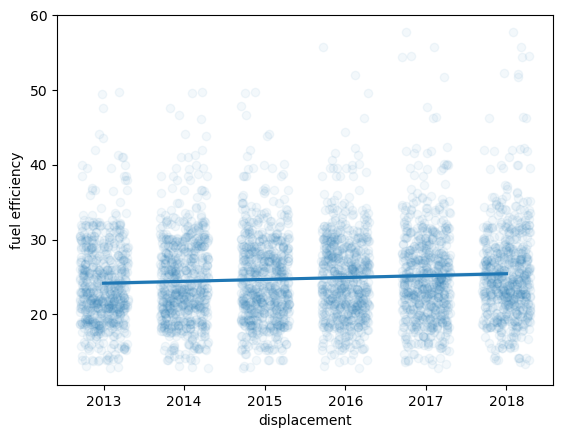

In [61]:
sns.regplot(data=fuel,x="year",y="comb",x_jitter=0.3,scatter_kws={"alpha":1/20})
plt.xlabel("displacement")
plt.ylabel("fuel efficiency")


Text(0, 0.5, 'fuel efficiency')

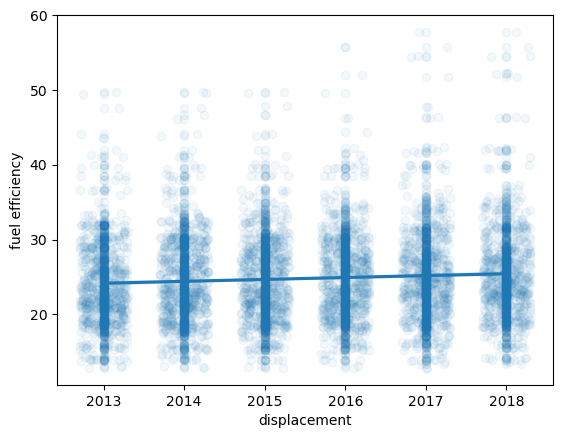

In [62]:
sns.regplot(data=fuel,x="year",y="comb",x_jitter=0.3,scatter_kws={"alpha":1/20})
plt.scatter(data=fuel,x="year",y="comb",alpha=1/20)
plt.xlabel("displacement")
plt.ylabel("fuel efficiency")

Heat map

Text(0, 0.5, 'fuel efficiency')

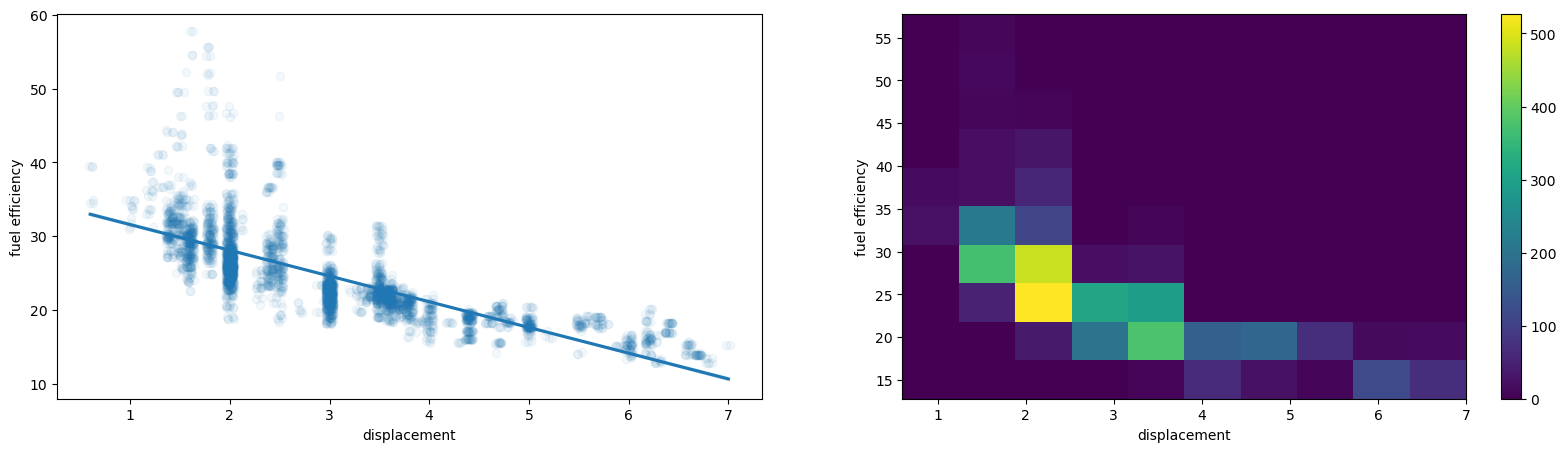

In [63]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sns.regplot(data=fuel,x="displ",y="comb",x_jitter=0.04,scatter_kws={"alpha":1/20})
plt.xlabel("displacement")
plt.ylabel("fuel efficiency")
plt.subplot(1,2,2)
plt.hist2d(data=fuel,x="displ",y="comb")
plt.colorbar()
plt.xlabel("displacement")
plt.ylabel("fuel efficiency")

Text(0, 0.5, 'fuel efficiency')

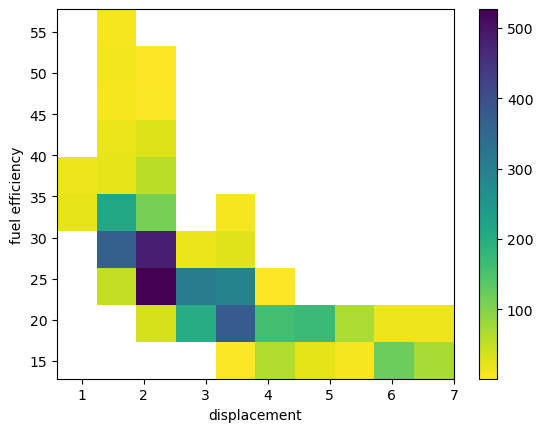

In [64]:
plt.hist2d(data=fuel,x="displ",y="comb",cmin=0.5,cmap="viridis_r")
plt.colorbar()
plt.xlabel("displacement")
plt.ylabel("fuel efficiency")

In [65]:
fuel[["displ","comb"]].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


Text(0, 0.5, 'fuel efficiency')

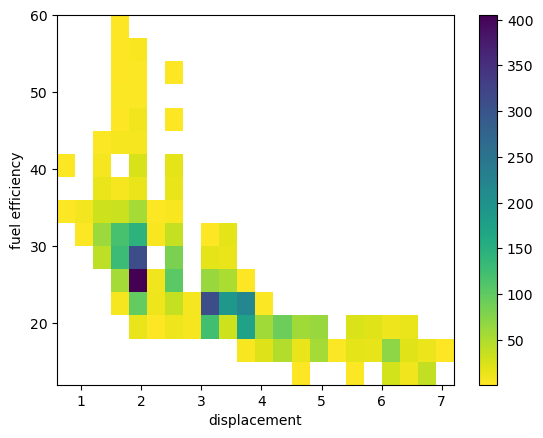

In [66]:
bins_x=np.arange(0.6,7+0.3,0.3)
bins_y=np.arange(12,58+3,3)
plt.hist2d(data=fuel,x="displ",y="comb",cmin=0.5,cmap="viridis_r",bins=[bins_x,bins_y])
plt.colorbar()
plt.xlabel("displacement")
plt.ylabel("fuel efficiency")

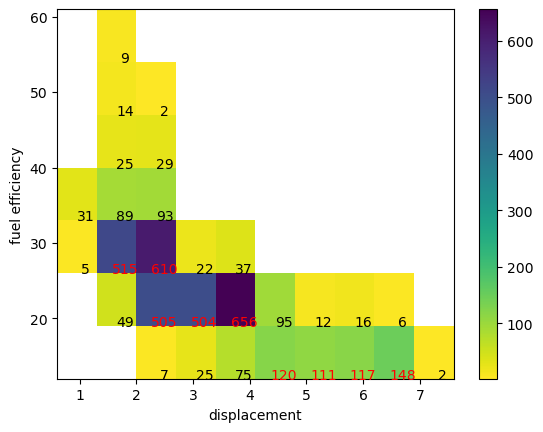

In [69]:
bins_x=np.arange(0.6,7+0.7,0.7)
bins_y=np.arange(12,58+7,7)
h2d=plt.hist2d(data=fuel,x="displ",y="comb",cmin=0.5,cmap="viridis_r",bins=[bins_x,bins_y])
plt.colorbar()
plt.xlabel("displacement")
plt.ylabel("fuel efficiency")

counts=h2d[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c=counts[i,j]
        if c>100:
            plt.text(bins_x[i]+0.5,bins_y[j]+0.5,int(c),ha="center",va="center",color="red")
        elif c>0:
            plt.text(bins_x[i]+0.5,bins_y[j]+0.5,int(c),ha="center",va="center",color="black")

In [70]:
fuel["VClass"].value_counts()

Midsize Cars        1188
Compact Cars        1122
Subcompact Cars      673
Large Cars           625
Minicompact Cars     321
Name: VClass, dtype: int64

In [71]:
#violin plots
sedan_classes=["Minicompact Cars","Subcompact Cars","Compact","Midsize Cars","Large Cars"]
Vclass=pd.api.types.CategoricalDtype(ordered=True,categories=sedan_classes)
fuel['VClass']=fuel["VClass"].astype(Vclass)

<AxesSubplot:xlabel='VClass', ylabel='comb'>

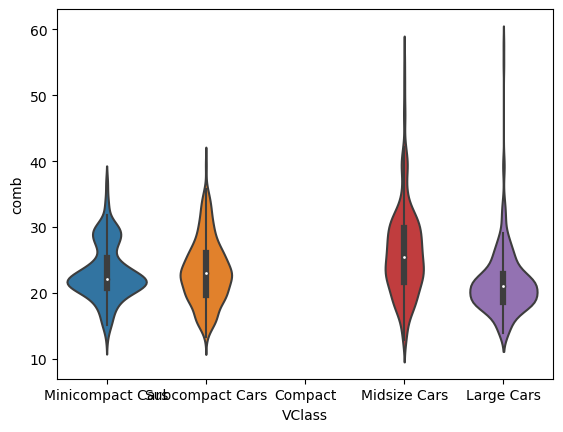

In [74]:
sns.violinplot(data=fuel,x="VClass",y="comb")

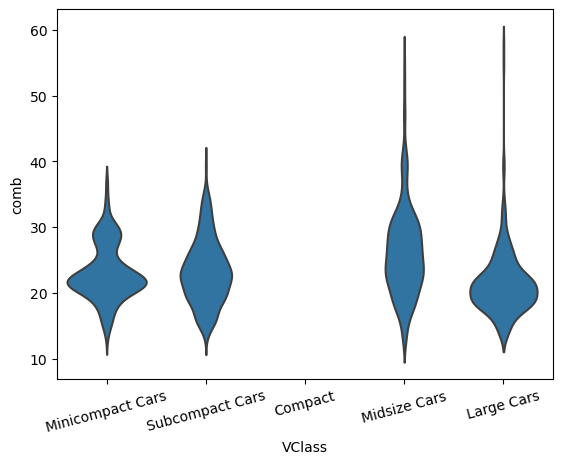

In [75]:
sns.violinplot(data=fuel,x="VClass",y="comb",inner=None,color=base_color)
plt.xticks(rotation=15);

(6.966470319355814, 63.09321945242605)

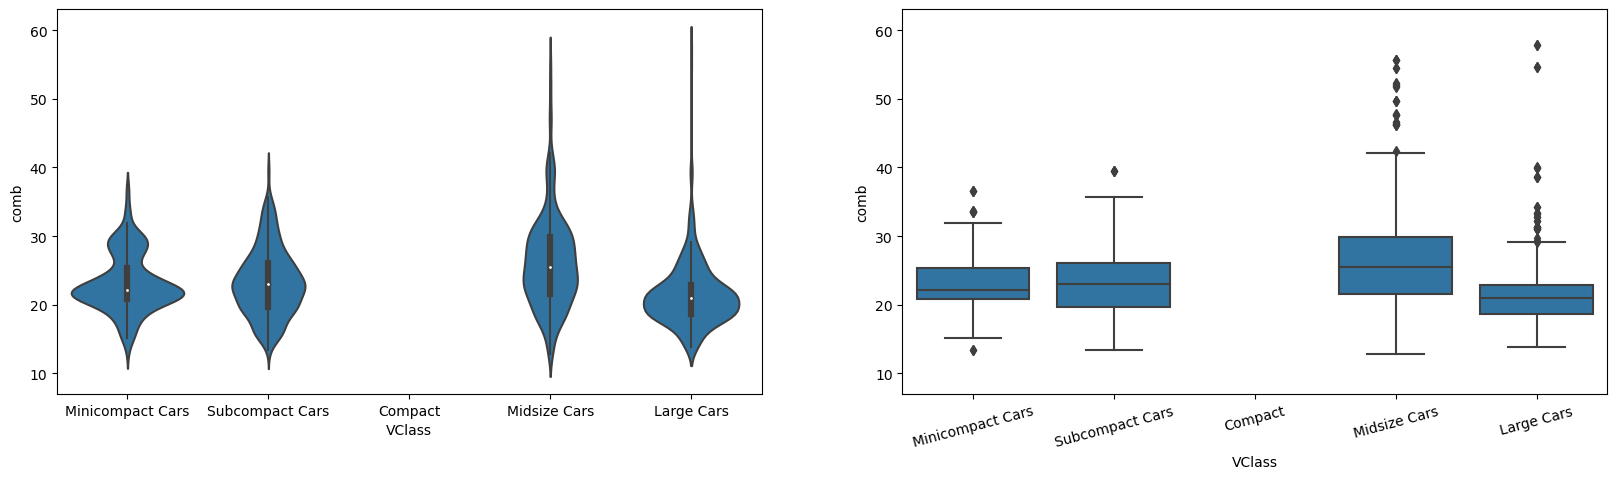

In [76]:
plt.figure(figsize=[20,5])
base_color=sns.color_palette()[0]
plt.subplot(1,2,1)
ax1=sns.violinplot(data=fuel,x="VClass",y="comb",color=base_color)

plt.subplot(1,2,2)
sns.boxplot(data=fuel,x="VClass",y="comb",color=base_color)
plt.xticks(rotation=15)
plt.ylim(ax1.get_ylim())

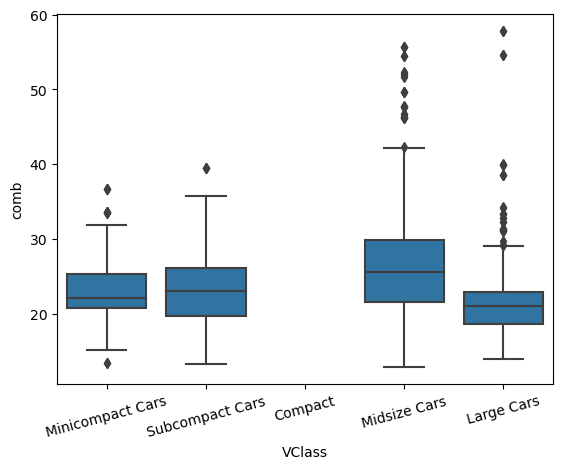

In [77]:

sns.boxplot(data=fuel,x="VClass",y="comb",color=base_color)
plt.xticks(rotation=15);

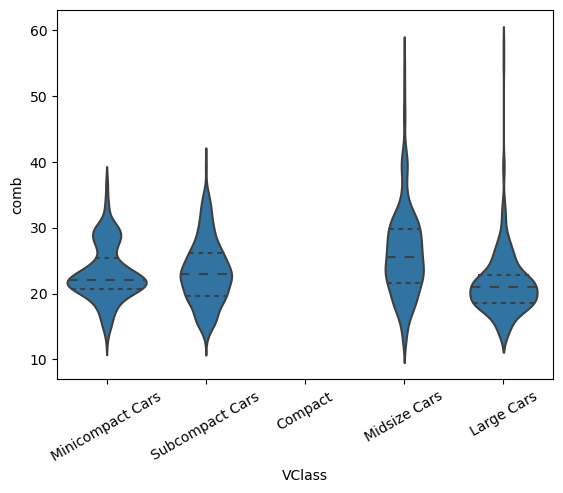

In [78]:

sedan_classes=["Minicompact Cars","Subcompact Cars","Compact","Midsize Cars","Large Cars"]
Vclass=pd.api.types.CategoricalDtype(ordered=True,categories=sedan_classes)
fuel["VClass"]=fuel["VClass"].astype(Vclass)
sns.violinplot(data=fuel,x="VClass",y="comb",inner="quartile",color=base_color)
plt.xticks(rotation=30);


In [79]:
fuel["trans"].value_counts()

Automatic (S8)                      814
Automatic (S6)                      739
Manual 6-spd                        658
Automatic (AM-S7)                   226
Automatic 7-spd                     212
Automatic (variable gear ratios)    178
Automatic 8-spd                     138
Automatic 6-spd                     126
Manual 5-spd                        126
Automatic (S7)                       98
Automatic (AM-S6)                    91
Manual 7-spd                         77
Automatic (AM6)                      75
Automatic (AM7)                      63
Automatic 9-spd                      62
Automatic (AV-S6)                    43
Automatic (AV-S7)                    43
Automatic 5-spd                      33
Automatic (AM-S8)                    27
Automatic 4-spd                      25
Automatic (AV-S8)                    22
Automatic (S5)                       14
Automatic (S9)                       14
Automatic (S10)                      13
Automatic (A1)                        7


In [91]:
fuel["transtype"]=fuel["trans"].apply(lambda x:x.split()[0])
fuel.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,transtype
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,NaN,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,NaN,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,NaN,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


In [92]:
ct_counts=fuel.groupby(["VClass","transtype"]).size()
ct_counts.head()

VClass            transtype
Minicompact Cars  Automatic    188
                  Manual       133
Subcompact Cars   Automatic    502
                  Manual       171
Compact           Automatic      0
dtype: int64

In [93]:
ct_counts=ct_counts.reset_index(name="count")

In [94]:
ct_counts=ct_counts.pivot(index="VClass",columns="transtype",values="count")

<AxesSubplot:xlabel='transtype', ylabel='VClass'>

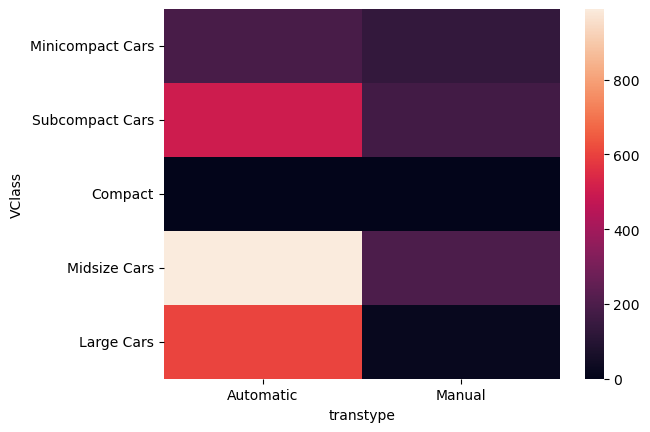

In [95]:
sns.heatmap(ct_counts)

<AxesSubplot:xlabel='transtype', ylabel='VClass'>

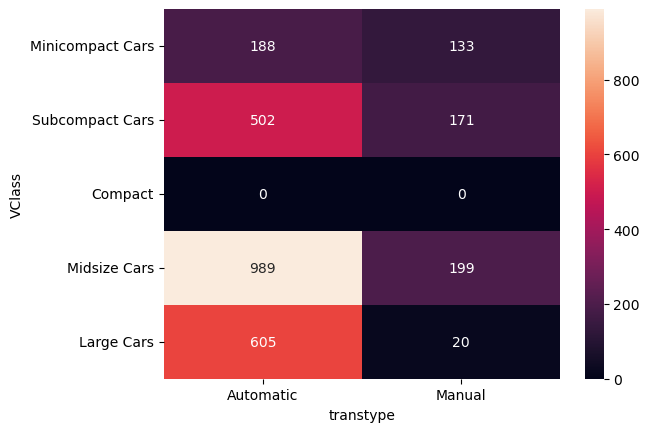

In [96]:
sns.heatmap(ct_counts,annot=True,fmt="d")


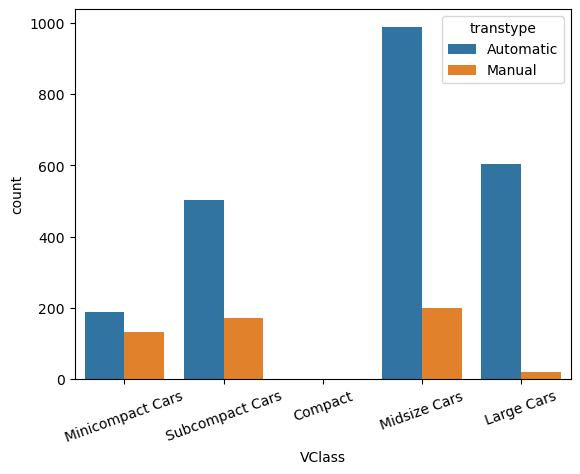

In [97]:
sns.countplot(data=fuel,x="VClass",hue="transtype")
plt.xticks(rotation=20);

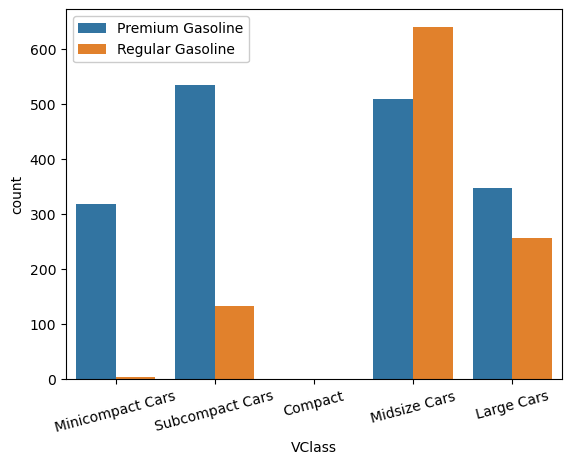

In [98]:
fuel_sub = fuel.loc[fuel['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
ax = sns.countplot(data = fuel_sub, x = 'VClass', hue = 'fuelType')
ax.legend(loc = 2, framealpha = 1) # lower right, no transparency
plt.xticks(rotation = 15);

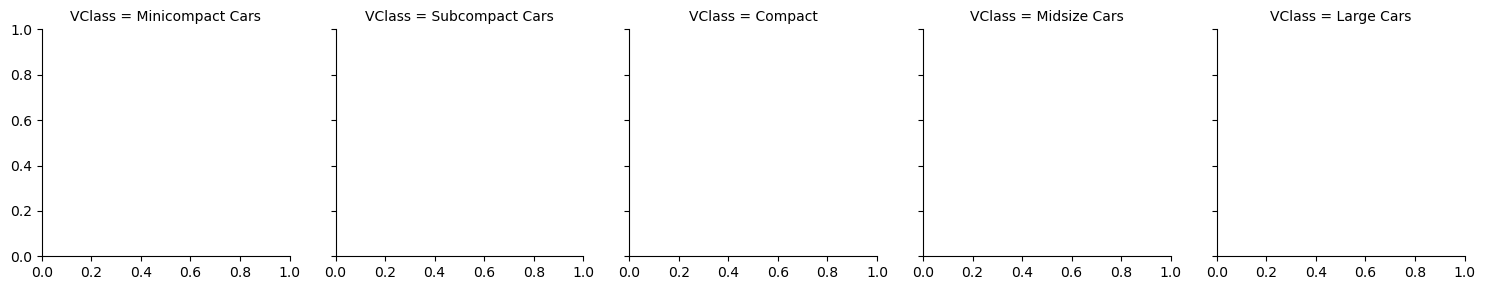

In [100]:
#faceting
sns.FacetGrid(data=fuel,col="VClass")

C:\Users\dell\anaconda\envs\kamal\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\dell\anaconda\envs\kamal\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\dell\anaconda\envs\kamal\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\dell\anaconda\envs\kamal\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


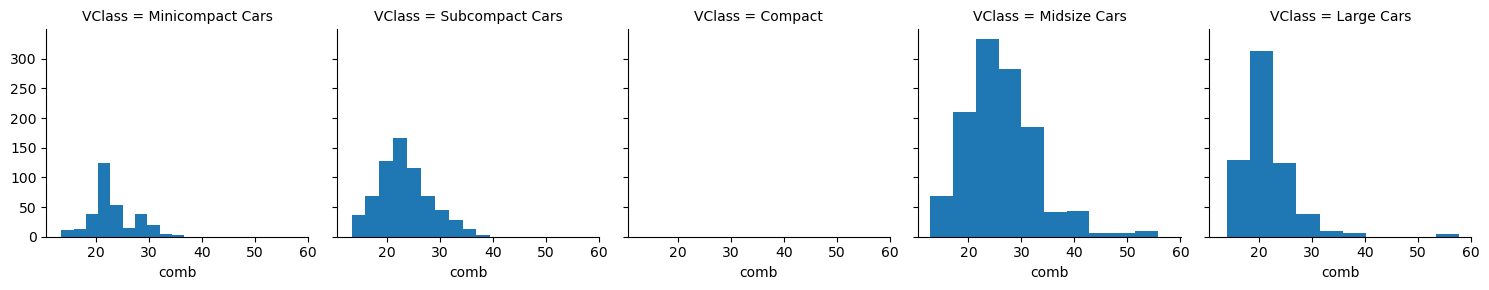

In [101]:
g=sns.FacetGrid(data=fuel,col="VClass")
g.map(plt.hist,"comb");

In [102]:
fuel["comb"].describe()

count    3929.000000
mean       24.791339
std         6.003246
min        12.821700
25%        20.658100
50%        24.000000
75%        28.227100
max        57.782400
Name: comb, dtype: float64

C:\Users\dell\anaconda\envs\kamal\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\dell\anaconda\envs\kamal\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\dell\anaconda\envs\kamal\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\dell\anaconda\envs\kamal\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


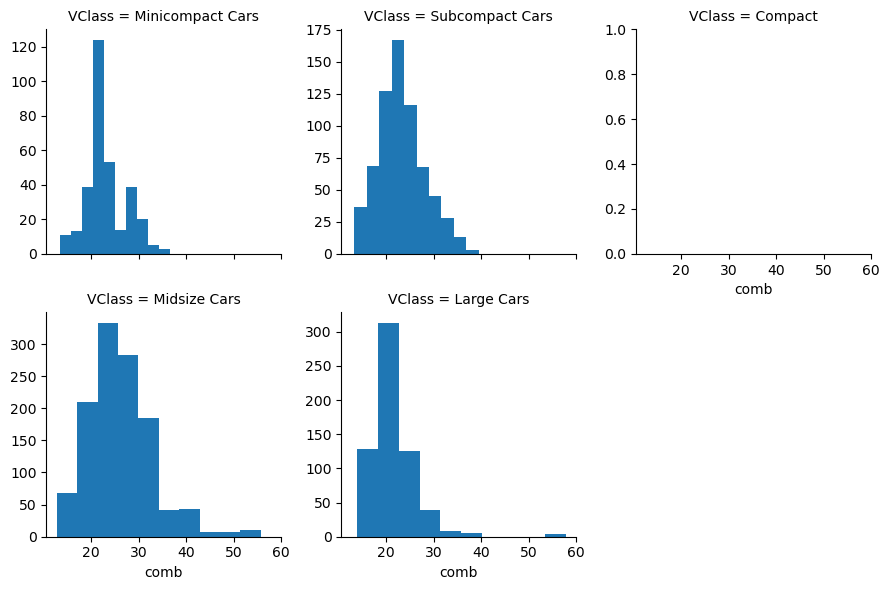

In [103]:
bins=np.arange(12,58+2,2)
g=sns.FacetGrid(data=fuel,col="VClass",col_wrap=3,sharey=False)
g.map(plt.hist,"comb");

In [104]:
group_means=fuel[["trans","comb"]].groupby(["trans"]).mean()
group_means

,comb
trans,
Automatic (A1),34.677929
Automatic (AM-S6),27.770877
Automatic (AM-S7),21.572946
Automatic (AM-S8),24.119489
Automatic (AM6),33.194893
Automatic (AM7),23.690389
Automatic (AM8),28.364450
Automatic (AV-S10),27.918867
Automatic (AV-S6),31.246947


In [105]:
group_order=group_means.sort_values(["comb"],ascending=False).index
group_order

Index(['Automatic (variable gear ratios)', 'Automatic (A1)', 'Automatic (AM6)',
       'Automatic (AV-S6)', 'Automatic (AV-S7)', 'Manual 5-spd',
       'Automatic 4-spd', 'Automatic (AM8)', 'Automatic (AV-S10)',
       'Automatic (AM-S6)', 'Automatic (AV-S8)', 'Manual 6-spd',
       'Automatic (S6)', 'Automatic 6-spd', 'Automatic (S5)', 'Automatic (S9)',
       'Automatic (AM-S8)', 'Automatic (AM7)', 'Automatic 9-spd',
       'Automatic (S7)', 'Automatic (S8)', 'Manual 7-spd', 'Automatic (AM-S7)',
       'Automatic (S10)', 'Automatic 7-spd', 'Automatic 8-spd',
       'Automatic 5-spd'],
      dtype='object', name='trans')

C:\Users\dell\anaconda\envs\kamal\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\dell\anaconda\envs\kamal\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\dell\anaconda\envs\kamal\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\dell\anaconda\envs\kamal\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\dell\anaconda\envs\kamal\lib\site-packages\seaborn\axisgrid.py:745: FutureW

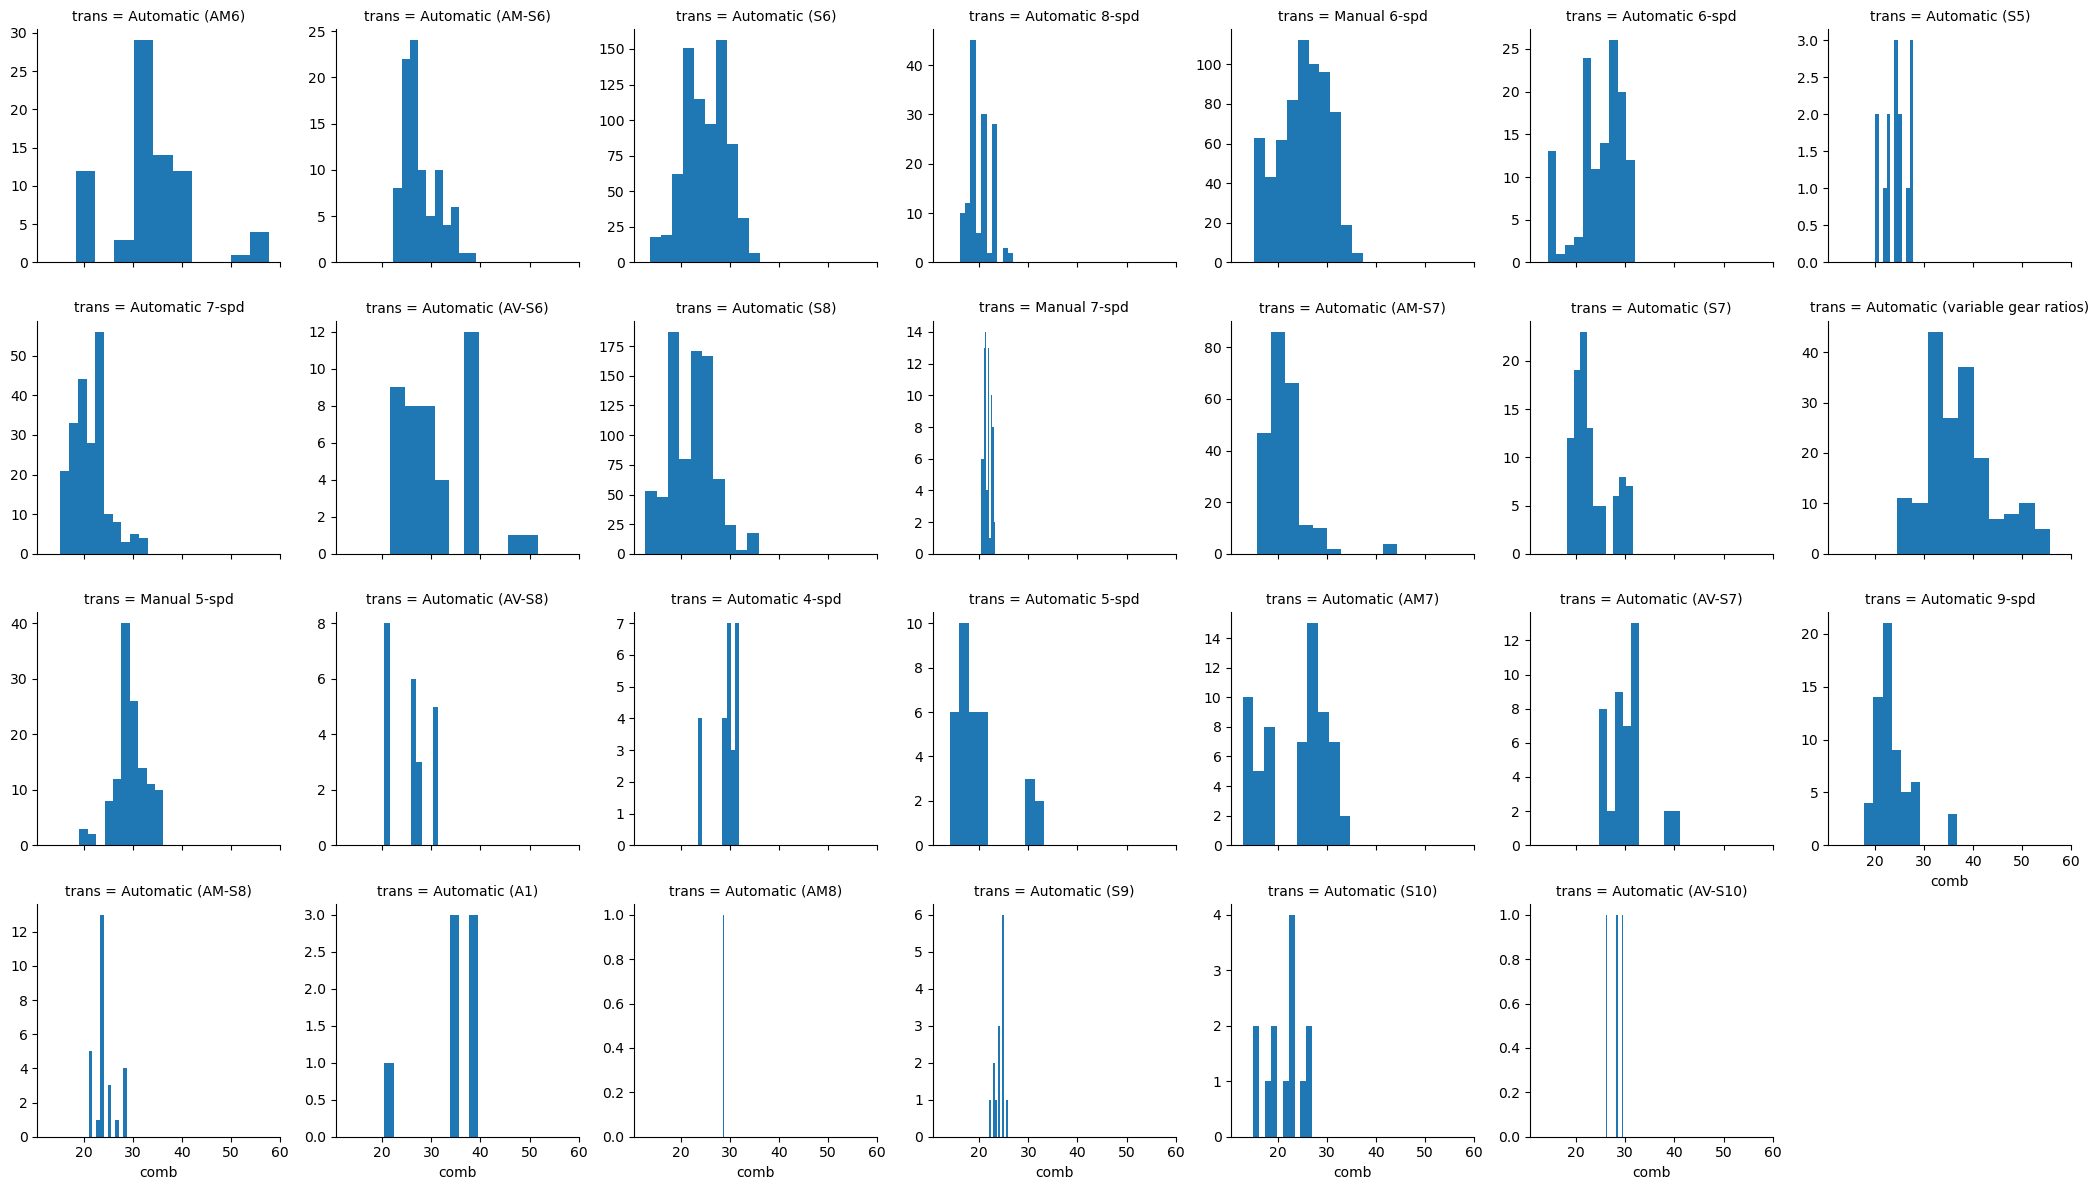

In [106]:
g=sns.FacetGrid(data=fuel,col="trans",col_wrap=7,sharey=False)
g.map(plt.hist,"comb");

Text(0, 0.5, 'Average efficiency')

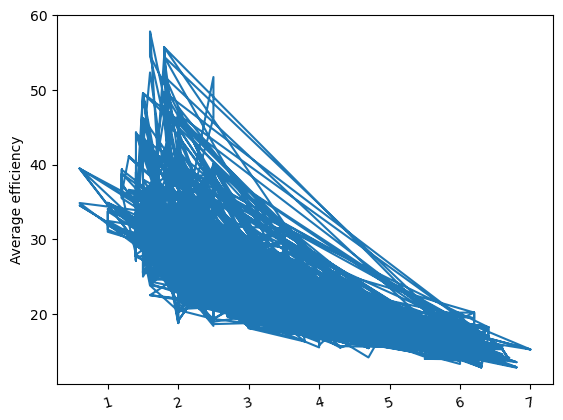

In [107]:
plt.errorbar(data=fuel,x="displ",y="comb")
plt.xticks(rotation=15)
plt.ylabel("Average efficiency")

In [108]:
bin_edges=np.arange(0.6,7+0.2,0.2)
bin_center=bin_edges[:-1]+0.1
displ_binned=pd.cut(fuel["displ"],bin_edges,include_lowest=True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

Text(0, 0.5, 'Average Efficiency(mpg)')

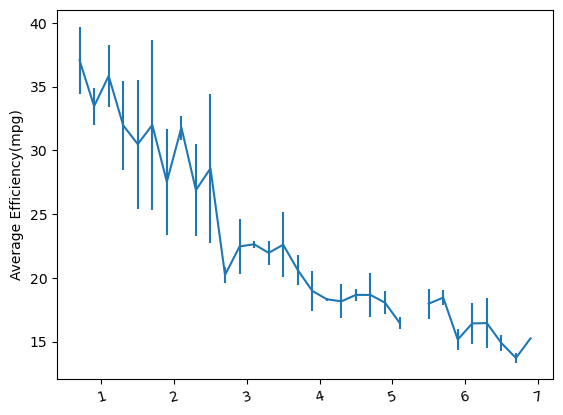

In [109]:
comb_mean=fuel["comb"].groupby(displ_binned).mean()
comb_std=fuel["comb"].groupby(displ_binned).std()
plt.errorbar(x=bin_center,y=comb_mean,yerr=comb_std)
plt.xticks(rotation=15)
plt.ylabel("Average Efficiency(mpg)")

C:\Users\dell\AppData\Local\Temp\ipykernel_1836\85546838.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=fuel,x='VClass',y="comb",color=base_color,ci="sd")


Text(0, 0.5, 'Average Efficiency(mpg)')

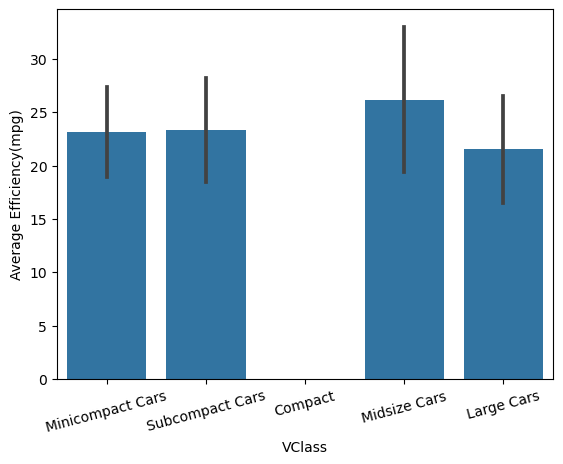

In [110]:
sns.barplot(data=fuel,x='VClass',y="comb",color=base_color,ci="sd")
plt.xticks(rotation=15)
plt.ylabel("Average Efficiency(mpg)")

C:\Users\dell\AppData\Local\Temp\ipykernel_1836\4258530131.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=fuel,x="VClass",y="comb",color=base_color,ci="sd")


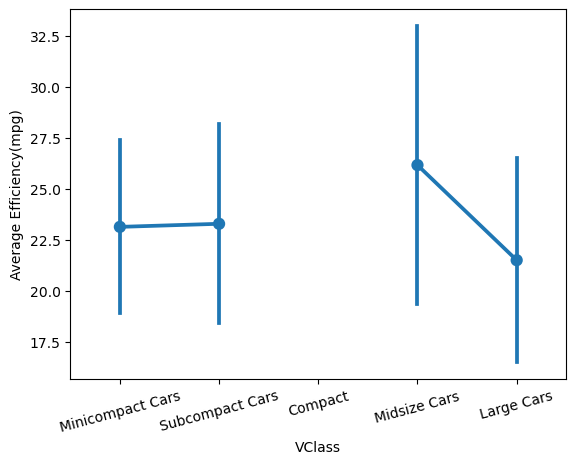

In [111]:
sns.pointplot(data=fuel,x="VClass",y="comb",color=base_color,ci="sd")
plt.xticks(rotation=15)
plt.ylabel("Average Efficiency(mpg)");


C:\Users\dell\AppData\Local\Temp\ipykernel_1836\2840382941.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=fuel,x="VClass",y="comb",color=base_color,ci="sd",linestyles="")


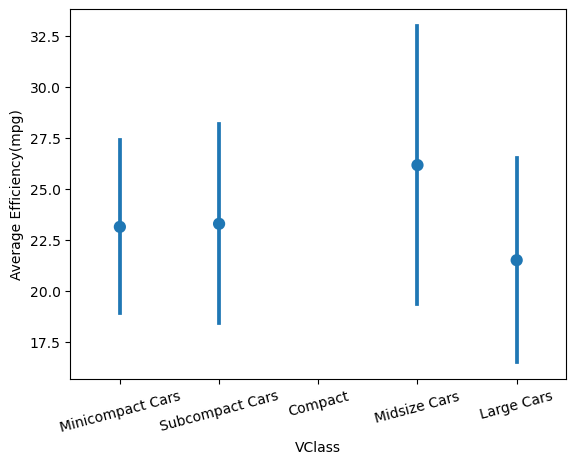

In [112]:
sns.pointplot(data=fuel,x="VClass",y="comb",color=base_color,ci="sd",linestyles="")
plt.xticks(rotation=15)
plt.ylabel("Average Efficiency(mpg)");


C:\Users\dell\AppData\Local\Temp\ipykernel_1836\280401710.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  make_means = fuel_sub.groupby('make').mean()
C:\Users\dell\anaconda\envs\kamal\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\dell\anaconda\envs\kamal\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\dell\anaconda\envs\kamal\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v 

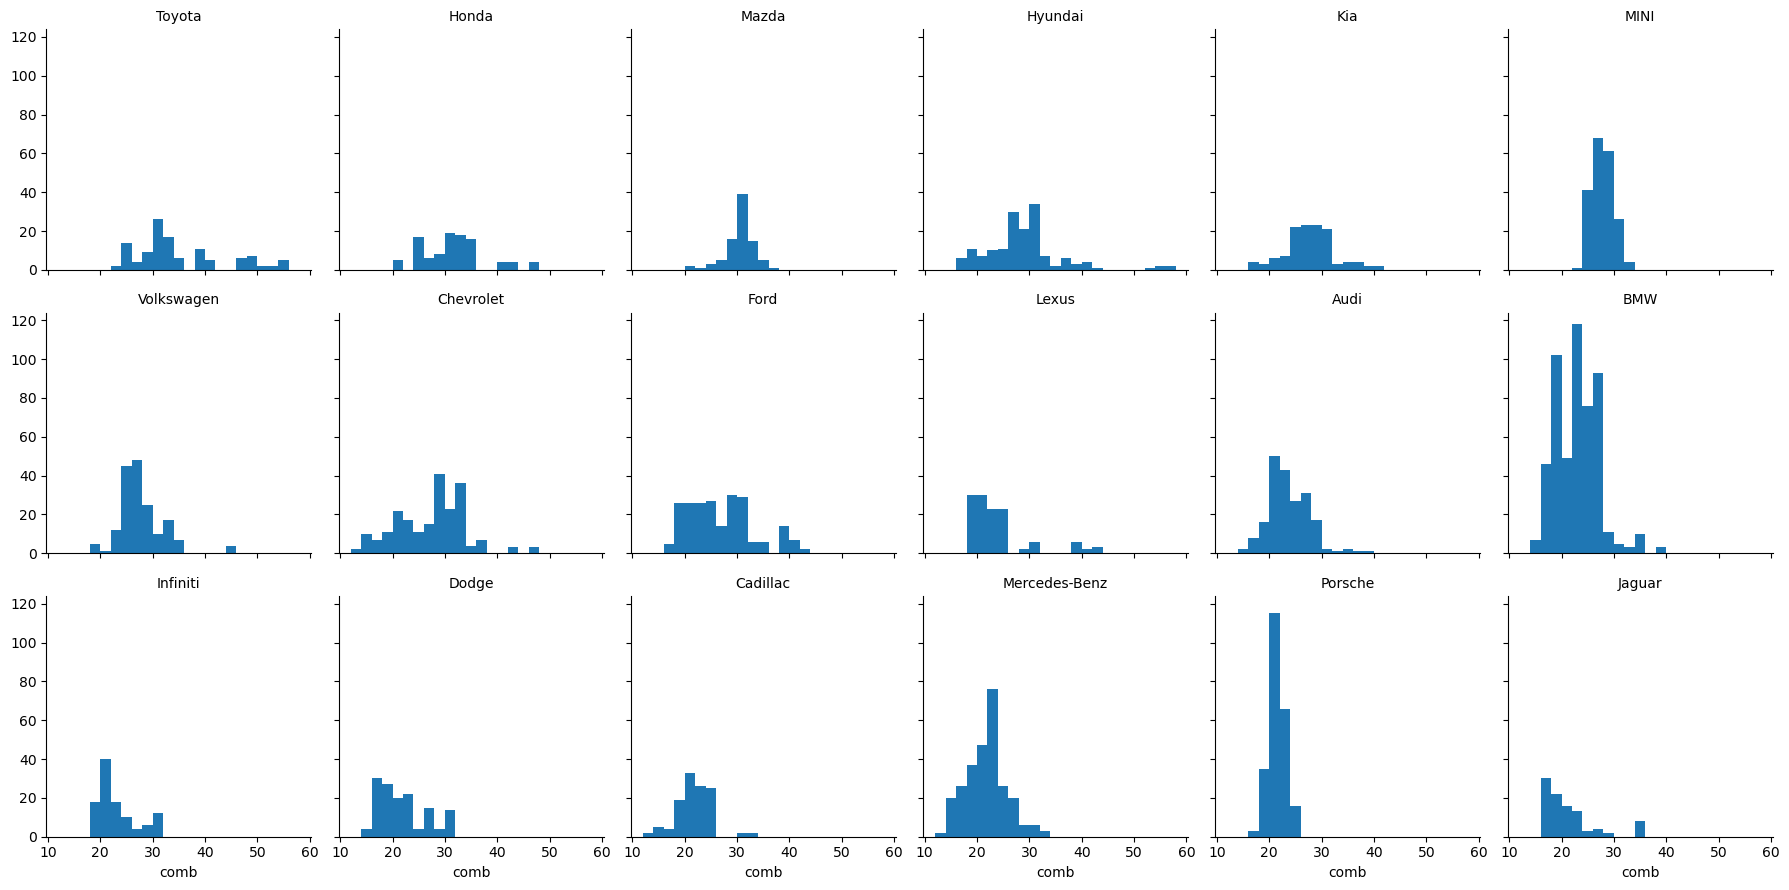

In [113]:
THRESHOLD = 80
make_frequency = fuel['make'].value_counts()
idx = np.sum(make_frequency > THRESHOLD)

most_makes = make_frequency.index[:idx]
fuel_sub = fuel.loc[fuel['make'].isin(most_makes)]

make_means = fuel_sub.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index

    # plotting
g = sns.FacetGrid(data = fuel_sub, col = 'make', col_wrap = 6,
                     col_order = comb_order)
    # try sb.distplot instead of plt.hist to see the plot in terms of density!
g.map(plt.hist, 'comb', bins = np.arange(12, fuel_sub['comb'].max()+2, 2))
g.set_titles('{col_name}')
    
    

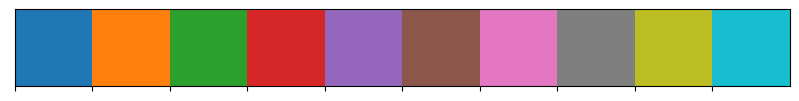

In [120]:
sns.palplot(sns.color_palette(n_colors=10))

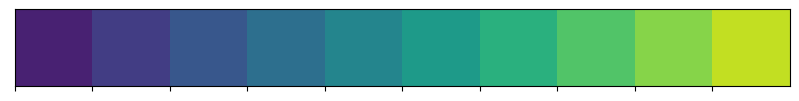

In [124]:
sns.palplot(sns.color_palette("viridis",10))

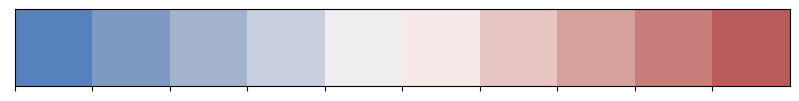

In [125]:
sns.palplot(sns.color_palette("vlag",10))

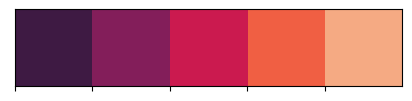

In [129]:
sns.palplot(sns.color_palette("rocket",5))

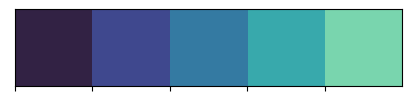

In [128]:
sns.palplot(sns.color_palette("mako",5))

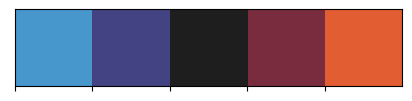

In [132]:
sns.palplot(sns.color_palette("icefire",5))